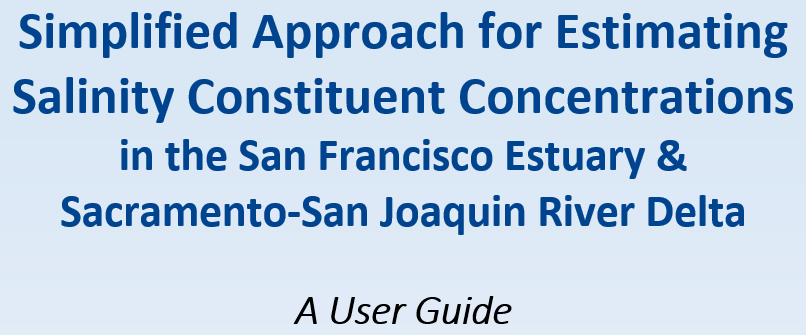

In [1]:
from IPython.display import Image
Image(filename="pic/1.png")

### This code was prepared by **Delta Modeling Section** based on Tetra Tech's report to simulate ion constituents in the Delta.
### Tetra Tech report uploaded in Resource folder
### Dataset: total dissolved solids (TDS), bromide (Br-), chloride (Cl-), sulfate (SO42-), Alkalinity, sodium (Na+), calcium (Ca2+), magnesium (Mg2+), and potassium (K+)

## Study area: Interior Delta with three subregions: 
###     1. Old-Middle River Export Corridor 
###     2. San Joaquin River Corridor 
###     3. South Delta 

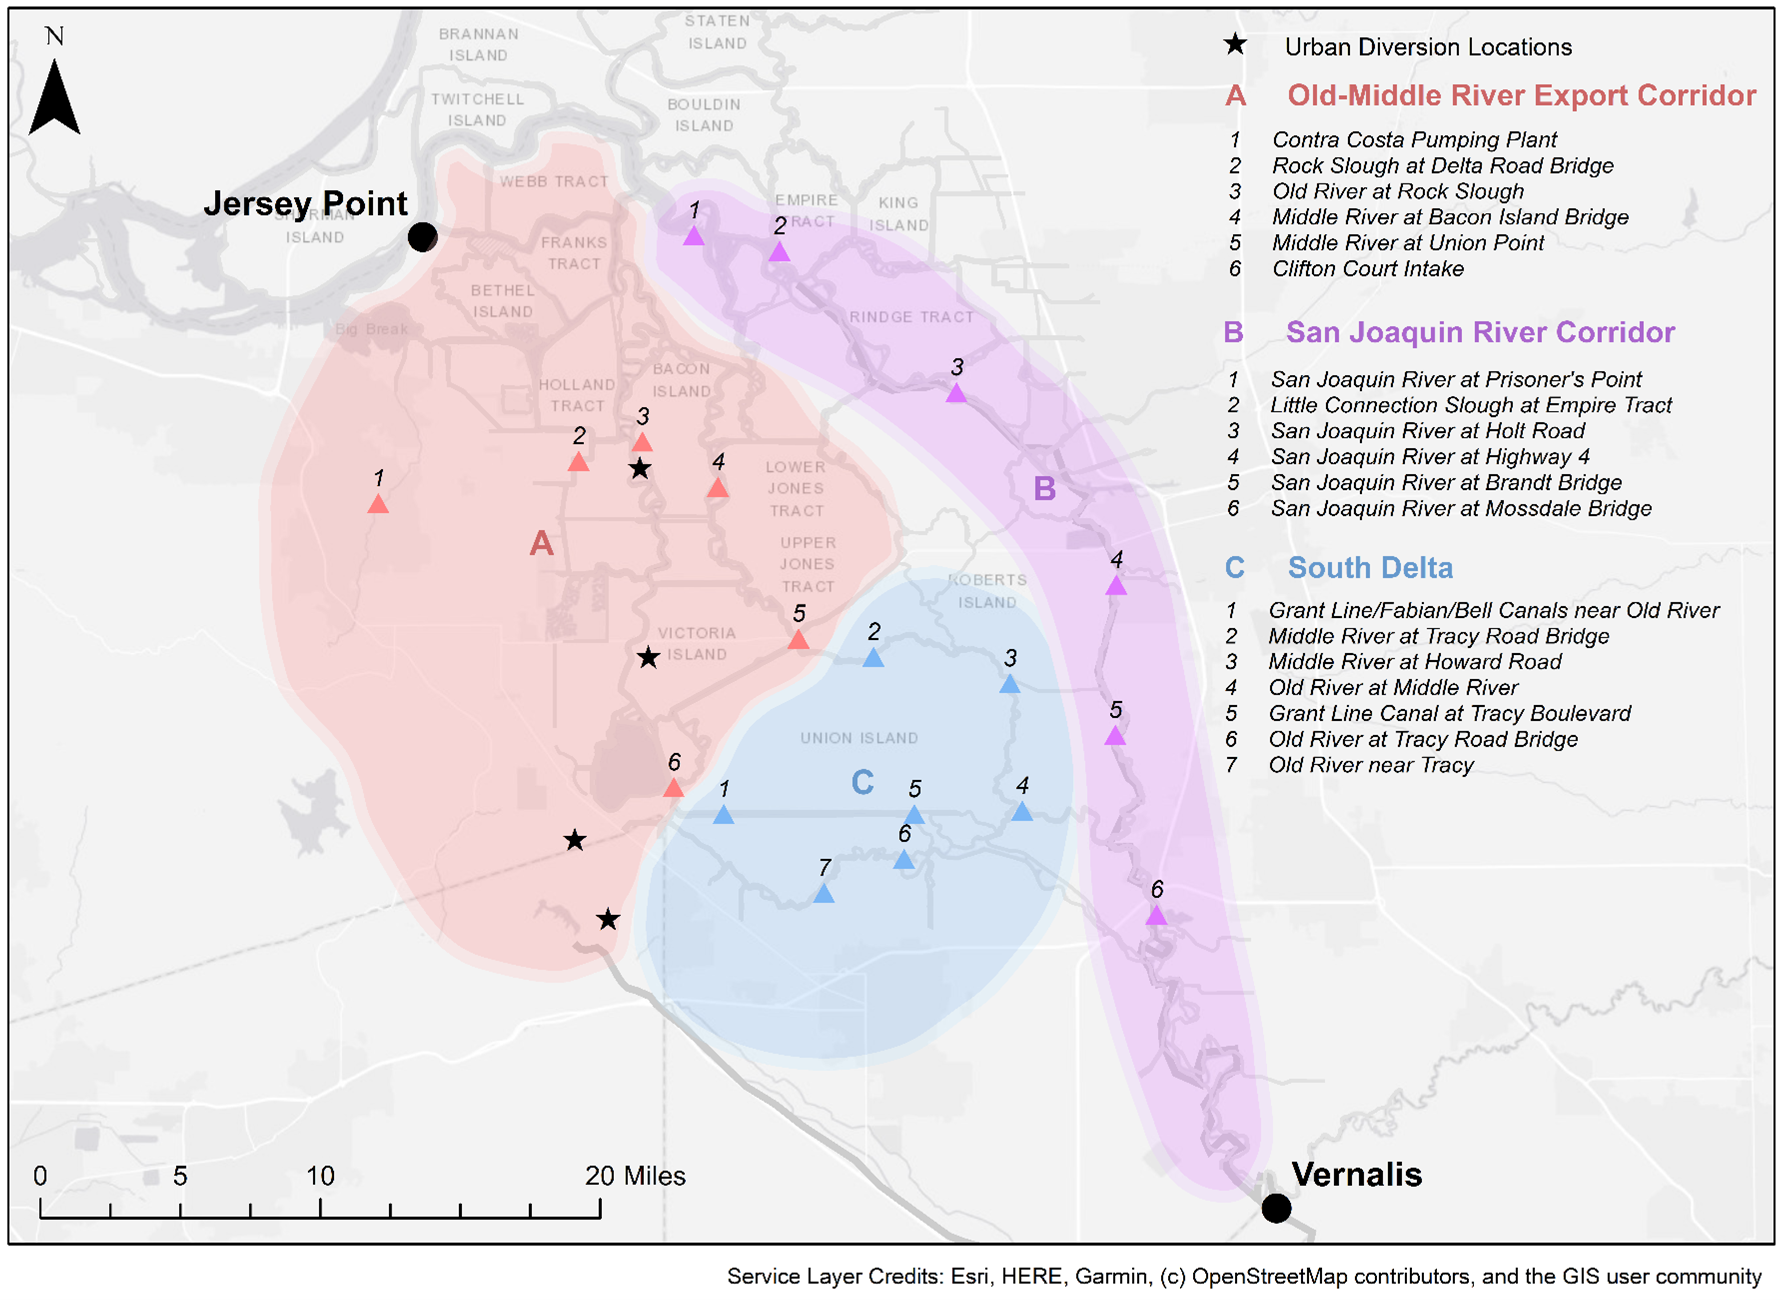

In [2]:
Image(filename="pic/2.png", width=1000, height=700)
#Credit by Tetra Tech

# 1. Import libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import seaborn as sns

# 2. Importing the dataset

In [4]:
Alk_path="inputs/Alkalinity.csv"
Br_path="inputs/Br.csv"
Ca_path="inputs/Ca.csv"
Cl_path="inputs/Cl.csv"
K_path="inputs/K.csv"
Mg_path="inputs/Mg.csv"
Na_path="inputs/Na.csv"
SO4_path="inputs/SO4.csv"
TDS_path="inputs/TDS.csv"

Alkalinity= pd.read_csv(Alk_path)
Br= pd.read_csv(Br_path)
Ca= pd.read_csv(Ca_path)
Cl= pd.read_csv(Cl_path)
K= pd.read_csv(K_path)
Mg= pd.read_csv(Mg_path)
Na= pd.read_csv(Na_path)
SO4= pd.read_csv(SO4_path)
TDS= pd.read_csv(TDS_path)

Alkalinity= pd.DataFrame(Alkalinity)
Br= pd.DataFrame(Br)
Ca= pd.DataFrame(Ca)
Cl= pd.DataFrame(Cl)
K = pd.DataFrame(K)
Mg= pd.DataFrame(Mg)
Na= pd.DataFrame(Na)
SO4= pd.DataFrame(SO4)
TDS= pd.DataFrame(TDS)

# 3. Data preprocessing (Preparing separate datasets for three subregions)

In [5]:
dataset2=Alkalinity['Collection Date'].str.split("/",n=2, expand=True)
dataset2 = pd.DataFrame(dataset2)
Alkalinity['year'] = dataset2[2].astype('int')
Alkalinity['Month'] = dataset2[0].astype('int')

dataset3=Br['Collection Date'].str.split("/",n=2, expand=True)
dataset3 = pd.DataFrame(dataset3)
Br['year'] = dataset3[2].astype('int')
Br['Month'] = dataset3[0].astype('int')

dataset4=Ca['Collection Date'].str.split("/",n=2, expand=True)
dataset4 = pd.DataFrame(dataset4)
Ca['year'] = dataset4[2].astype('int')
Ca['Month'] = dataset4[0].astype('int')

dataset5=Cl['Collection Date'].str.split("/",n=2, expand=True)
dataset5 = pd.DataFrame(dataset5)
Cl['year'] = dataset5[2].astype('int')
Cl['Month'] = dataset5[0].astype('int')

dataset6=Ca['Collection Date'].str.split("/",n=2, expand=True)
dataset6 = pd.DataFrame(dataset6)
Ca['year'] = dataset6[2].astype('int')
Ca['Month'] = dataset6[0].astype('int')

dataset7=K['Collection Date'].str.split("/",n=2, expand=True)
dataset7 = pd.DataFrame(dataset7)
K['year'] = dataset7[2].astype('int')
K['Month'] = dataset7[0].astype('int')

dataset8=Mg['Collection Date'].str.split("/",n=2, expand=True)
dataset8 = pd.DataFrame(dataset8)
Mg['year'] = dataset8[2].astype('int')
Mg['Month'] = dataset8[0].astype('int')

dataset9=Na['Collection Date'].str.split("/",n=2, expand=True)
dataset9 = pd.DataFrame(dataset9)
Na['year'] = dataset9[2].astype('int')
Na['Month'] = dataset9[0].astype('int')

dataset10=SO4['Collection Date'].str.split("/",n=2, expand=True)
dataset10 = pd.DataFrame(dataset10)
SO4['year'] = dataset10[2].astype('int')
SO4['Month'] = dataset10[0].astype('int')

dataset11=TDS['Collection Date'].str.split("/",n=2, expand=True)
dataset11 = pd.DataFrame(dataset11)
TDS['year'] = dataset11[2].astype('int')
TDS['Month'] = dataset11[0].astype('int')

In [6]:
alk_south=Alkalinity[Alkalinity['Location'].isin(['SouthDelta'])]
alk_south=pd.DataFrame(alk_south)

Br_south=Br[Br['Location'].isin(['SouthDelta'])]
Br_south=pd.DataFrame(Br_south)

Ca_south=Ca[Ca['Location'].isin(['SouthDelta'])]
Ca_south=pd.DataFrame(Ca_south)

Cl_south=Cl[Cl['Location'].isin(['SouthDelta'])]
Cl_south=pd.DataFrame(Cl_south)

K_south=K[K['Location'].isin(['SouthDelta'])]
K_south=pd.DataFrame(K_south)

Mg_south=Mg[Mg['Location'].isin(['SouthDelta'])]
Mg_south=pd.DataFrame(Mg_south)

Na_south=Na[Na['Location'].isin(['SouthDelta'])]
Na_south=pd.DataFrame(Na_south)

SO4_south=SO4[SO4['Location'].isin(['SouthDelta'])]
SO4_south=pd.DataFrame(SO4_south)

TDS_south=TDS[TDS['Location'].isin(['SouthDelta'])]
TDS_south=pd.DataFrame(TDS_south)

In [7]:
alk_SJ=Alkalinity[Alkalinity['Location'].isin(['SJRcorridor'])]
alk_SJ=pd.DataFrame(alk_SJ)

Br_SJ=Br[Br['Location'].isin(['SJRcorridor'])]
Br_SJ=pd.DataFrame(Br_SJ)

Ca_SJ=Ca[Ca['Location'].isin(['SJRcorridor'])]
Ca_SJ=pd.DataFrame(Ca_SJ)

Cl_SJ=Cl[Cl['Location'].isin(['SJRcorridor'])]
Cl_SJ=pd.DataFrame(Cl_SJ)

K_SJ=K[K['Location'].isin(['SJRcorridor'])]
K_SJ=pd.DataFrame(K_SJ)

Mg_SJ=Mg[Mg['Location'].isin(['SJRcorridor'])]
Mg_SJ=pd.DataFrame(Mg_SJ)

Na_SJ=Na[Na['Location'].isin(['SJRcorridor'])]
Na_SJ=pd.DataFrame(Na_SJ)

SO4_SJ=SO4[SO4['Location'].isin(['SJRcorridor'])]
SO4_SJ=pd.DataFrame(SO4_SJ)

TDS_SJ=TDS[TDS['Location'].isin(['SJRcorridor'])]
TDS_SJ=pd.DataFrame(TDS_SJ)

In [8]:
alk_OMR=Alkalinity[Alkalinity['Location'].isin(['OMR'])]
alk_OMR=pd.DataFrame(alk_OMR)

Br_OMR=Br[Br['Location'].isin(['OMR'])]
Br_OMR=pd.DataFrame(Br_OMR)

Ca_OMR=Ca[Ca['Location'].isin(['OMR'])]
Ca_OMR=pd.DataFrame(Ca_OMR)

Cl_OMR=Cl[Cl['Location'].isin(['OMR'])]
Cl_OMR=pd.DataFrame(Cl_OMR)

K_OMR=K[K['Location'].isin(['OMR'])]
K_OMR=pd.DataFrame(K_OMR)

Mg_OMR=Mg[Mg['Location'].isin(['OMR'])]
Mg_OMR=pd.DataFrame(Mg_OMR)

Na_OMR=Na[Na['Location'].isin(['OMR'])]
Na_OMR=pd.DataFrame(Na_OMR)

SO4_OMR=SO4[SO4['Location'].isin(['OMR'])]
SO4_OMR=pd.DataFrame(SO4_OMR)

TDS_OMR=TDS[TDS['Location'].isin(['OMR'])]
TDS_OMR=pd.DataFrame(TDS_OMR)


## adding simulated column

In [9]:
alk_south['simulated'] = np.nan
Br_south['simulated'] = np.nan
Ca_south['simulated'] = np.nan
Cl_south['simulated'] = np.nan
K_south['simulated'] = np.nan
Mg_south['simulated'] = np.nan
Na_south['simulated'] = np.nan
SO4_south['simulated'] = np.nan
TDS_south['simulated'] = np.nan

In [10]:
alk_SJ['simulated'] = np.nan
Br_SJ['simulated'] = np.nan
Ca_SJ['simulated'] = np.nan
Cl_SJ['simulated'] = np.nan
K_SJ['simulated'] = np.nan
Mg_SJ['simulated'] = np.nan
Na_SJ['simulated'] = np.nan
SO4_SJ['simulated'] = np.nan
TDS_SJ['simulated'] = np.nan

In [11]:
alk_OMR['simulated'] = np.nan
Br_OMR['simulated'] = np.nan
Ca_OMR['simulated'] = np.nan
Cl_OMR['simulated'] = np.nan
K_OMR['simulated'] = np.nan
Mg_OMR['simulated'] = np.nan
Na_OMR['simulated'] = np.nan
SO4_OMR['simulated'] = np.nan
TDS_OMR['simulated'] = np.nan

### Tetra Tech proposed two look up table to simulate ion constituents:
>1.when X2 position is unknown <br>
>2.when X2 position is known 
### X2 position is known was selected in this study


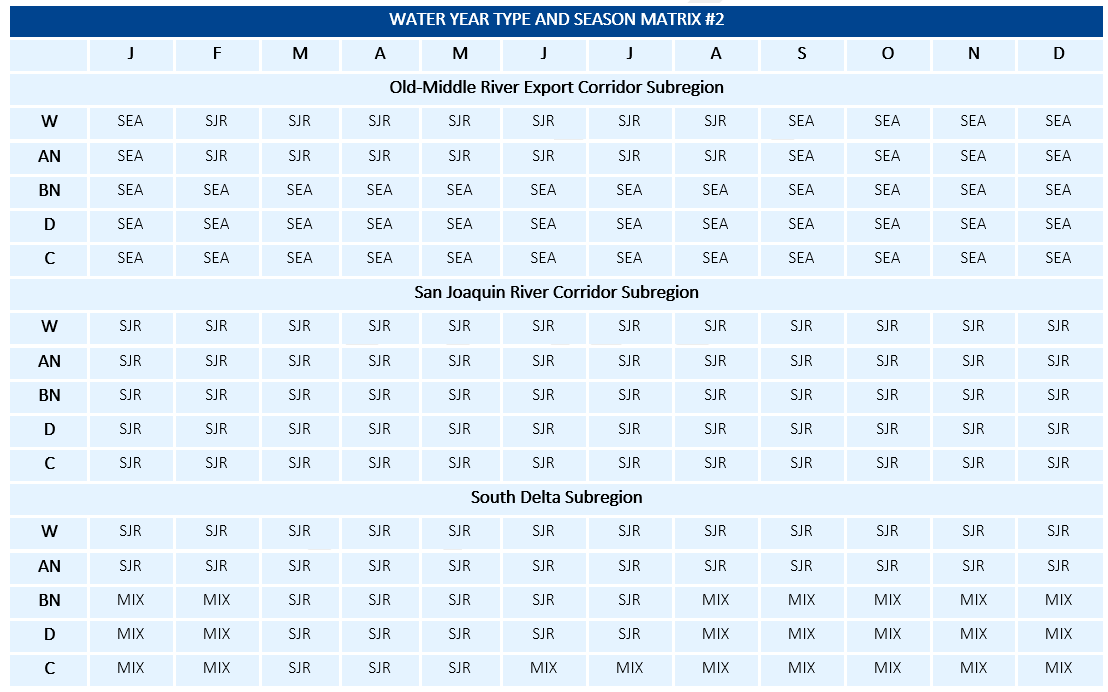

In [12]:
Image(filename="pic/4.png", width=1000, height=700)
#Credit by Tetra Tech

## Seawater Boundary Region

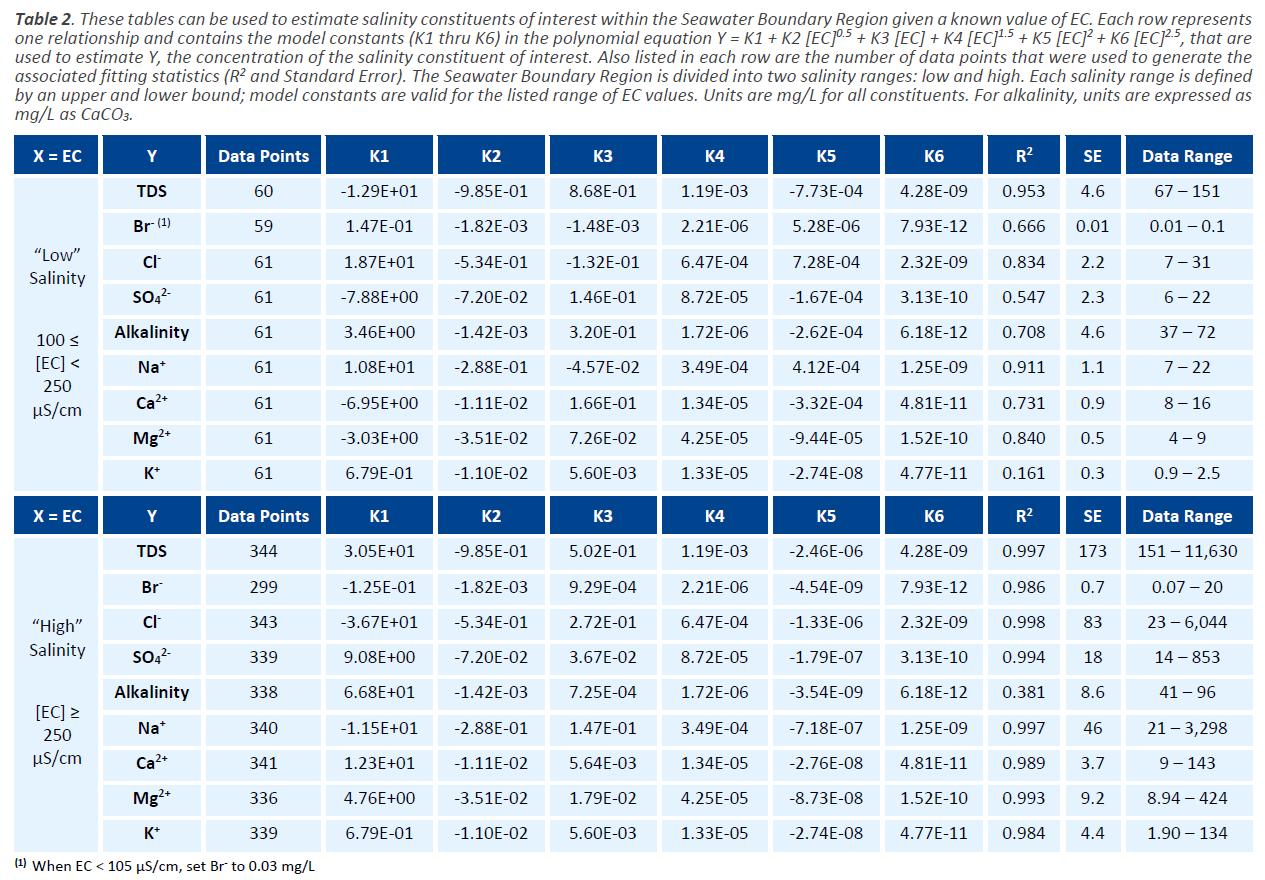

In [13]:
Image(filename="pic/SeaModified.png")
#Credit by Tetra Tech

## San Joaquin River Boundary Region

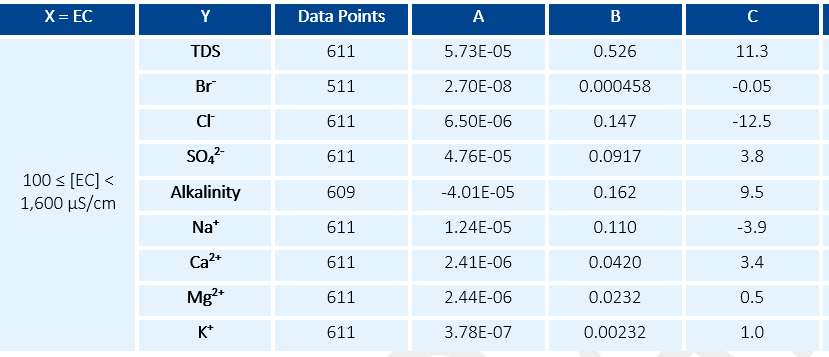

In [14]:
Image(filename="pic/SJ.png")
#Credit by Tetra Tech

## Blended Boundary Influence

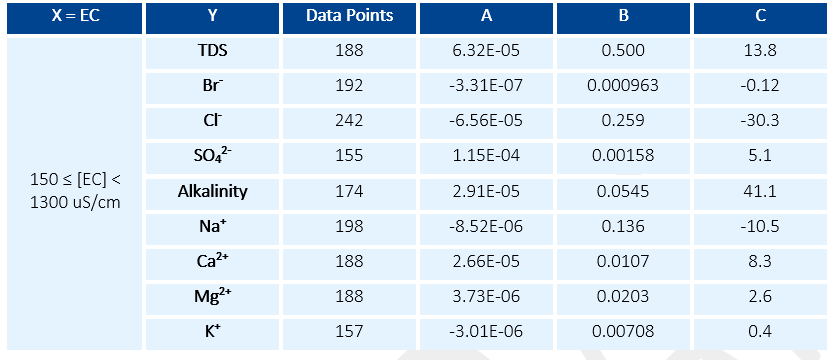

In [15]:
Image(filename="pic/mix.png")
#Credit by Tetra Tech

## South Delta simulation

In [16]:
####################### South Delta known X2 #########################

alk_south.loc[(alk_south['WYT'] == 'BN') & ((alk_south['Month']<3) | (alk_south['Month']>7)), 'simulated'] = 2.91E-05*(alk_south['EC'])*(alk_south['EC'])+ 0.0545*(alk_south['EC'])+41.1
alk_south.loc[(alk_south['WYT'] == 'D') & ((alk_south['Month']<3) | (alk_south['Month']>7)), 'simulated'] = 2.91E-05*(alk_south['EC'])*(alk_south['EC'])+ 0.0545*(alk_south['EC'])+41.1
alk_south.loc[(alk_south['WYT'] == 'C') & ((alk_south['Month']<3) | (alk_south['Month']>5)), 'simulated'] = 2.91E-05*(alk_south['EC'])*(alk_south['EC'])+ 0.0545*(alk_south['EC'])+41.1

Br_south.loc[(Br_south['WYT'] == 'BN') & ((Br_south['Month']<3) | (Br_south['Month']>7)), 'simulated'] = -3.31E-07*(Br_south['EC'])*(Br_south['EC'])+ 0.000963*(Br_south['EC']) - 0.12
Br_south.loc[(Br_south['WYT'] == 'D') & ((Br_south['Month']<3) | (Br_south['Month']>7)), 'simulated'] =  -3.31E-07*(Br_south['EC'])*(Br_south['EC'])+ 0.000963*(Br_south['EC']) - 0.12
Br_south.loc[(Br_south['WYT'] == 'C') & ((Br_south['Month']<3) | (Br_south['Month']>5)), 'simulated'] =  -3.31E-07*(Br_south['EC'])*(Br_south['EC'])+ 0.000963*(Br_south['EC']) - 0.12

Ca_south.loc[(Ca_south['WYT'] == 'BN') & ((Ca_south['Month']<3) | (Ca_south['Month']>7)), 'simulated'] = 2.66E-05*(Ca_south['EC'])*(Ca_south['EC'])+ 0.0107*(Ca_south['EC'])+8.3
Ca_south.loc[(Ca_south['WYT'] == 'D') & ((Ca_south['Month']<3) | (Ca_south['Month']>7)), 'simulated'] = 2.66E-05*(Ca_south['EC'])*(Ca_south['EC'])+ 0.0107*(Ca_south['EC'])+8.3
Ca_south.loc[(Ca_south['WYT'] == 'C') & ((Ca_south['Month']<3) | (Ca_south['Month']>5)), 'simulated'] = 2.66E-05*(Ca_south['EC'])*(Ca_south['EC'])+ 0.0107*(Ca_south['EC'])+8.3

Cl_south.loc[(Cl_south['WYT'] == 'BN') & ((Cl_south['Month']<3) | (Cl_south['Month']>7)), 'simulated'] = -6.56E-05*(Cl_south['EC'])*(Cl_south['EC'])+ 0.259*(Cl_south['EC'])-30.3
Cl_south.loc[(Cl_south['WYT'] == 'D') & ((Cl_south['Month']<3) | (Cl_south['Month']>7)), 'simulated'] = -6.56E-05*(Cl_south['EC'])*(Cl_south['EC'])+ 0.259*(Cl_south['EC'])-30.3
Cl_south.loc[(Cl_south['WYT'] == 'C') & ((Cl_south['Month']<3) | (Cl_south['Month']>5)), 'simulated'] = -6.56E-05*(Cl_south['EC'])*(Cl_south['EC'])+ 0.259*(Cl_south['EC'])-30.3

K_south.loc[(K_south['WYT'] == 'BN') & ((K_south['Month']<3) | (K_south['Month']>7)), 'simulated'] = -3.01E-06*(K_south['EC'])*(K_south['EC'])+ 0.00708*(K_south['EC'])+0.4
K_south.loc[(K_south['WYT'] == 'D') & ((K_south['Month']<3) | (K_south['Month']>7)), 'simulated'] = -3.01E-06*(K_south['EC'])*(K_south['EC'])+ 0.00708*(K_south['EC'])+0.4
K_south.loc[(K_south['WYT'] == 'C') & ((K_south['Month']<3) | (K_south['Month']>5)), 'simulated'] = -3.01E-06*(K_south['EC'])*(K_south['EC'])+ 0.00708*(K_south['EC'])+0.4

Mg_south.loc[(Mg_south['WYT'] == 'BN') & ((Mg_south['Month']<3) | (Mg_south['Month']>7)), 'simulated'] = 3.73E-06*(Mg_south['EC'])*(Mg_south['EC'])+ 0.0203*(Mg_south['EC'])+2.6
Mg_south.loc[(Mg_south['WYT'] == 'D') & ((Mg_south['Month']<3) | (Mg_south['Month']>7)), 'simulated'] = 3.73E-06*(Mg_south['EC'])*(Mg_south['EC'])+ 0.0203*(Mg_south['EC'])+2.6
Mg_south.loc[(Mg_south['WYT'] == 'C') & ((Mg_south['Month']<3) | (Mg_south['Month']>5)), 'simulated'] = 3.73E-06*(Mg_south['EC'])*(Mg_south['EC'])+ 0.0203*(Mg_south['EC'])+2.6

Na_south.loc[(Na_south['WYT'] == 'BN') & ((Na_south['Month']<3) | (Na_south['Month']>7)), 'simulated'] = -8.52E-06*(Na_south['EC'])*(Na_south['EC'])+ 0.136*(Na_south['EC']) - 10.5
Na_south.loc[(Na_south['WYT'] == 'D') & ((Na_south['Month']<3) | (Na_south['Month']>7)), 'simulated'] = -8.52E-06*(Na_south['EC'])*(Na_south['EC'])+ 0.136*(Na_south['EC']) - 10.5
Na_south.loc[(Na_south['WYT'] == 'C') & ((Na_south['Month']<3) | (Na_south['Month']>5)), 'simulated'] = -8.52E-06*(Na_south['EC'])*(Na_south['EC'])+ 0.136*(Na_south['EC']) - 10.5

SO4_south.loc[(SO4_south['WYT'] == 'BN') & ((SO4_south['Month']<3) | (SO4_south['Month']>7)), 'simulated'] = 1.15E-04*(SO4_south['EC'])*(SO4_south['EC'])+ 0.00158*(SO4_south['EC'])+5.1
SO4_south.loc[(SO4_south['WYT'] == 'D') & ((SO4_south['Month']<3) | (SO4_south['Month']>7)), 'simulated'] = 1.15E-04*(SO4_south['EC'])*(SO4_south['EC'])+ 0.00158*(SO4_south['EC'])+5.1
SO4_south.loc[(SO4_south['WYT'] == 'C') & ((SO4_south['Month']<3) | (SO4_south['Month']>5)), 'simulated'] = 1.15E-04*(SO4_south['EC'])*(SO4_south['EC'])+ 0.00158*(SO4_south['EC'])+5.1

TDS_south.loc[(TDS_south['WYT'] == 'BN') & ((TDS_south['Month']<3) | (TDS_south['Month']>7)), 'simulated'] = 6.32E-05*(TDS_south['EC'])*(TDS_south['EC'])+ 0.500*(TDS_south['EC'])+13.8
TDS_south.loc[(TDS_south['WYT'] == 'D') & ((TDS_south['Month']<3) | (TDS_south['Month']>7)), 'simulated'] = 6.32E-05*(TDS_south['EC'])*(TDS_south['EC'])+ 0.500*(TDS_south['EC'])+13.8
TDS_south.loc[(TDS_south['WYT'] == 'C') & ((TDS_south['Month']<3) | (TDS_south['Month']>5)), 'simulated'] = 6.32E-05*(TDS_south['EC'])*(TDS_south['EC'])+ 0.500*(TDS_south['EC'])+13.8

alk_south.loc[(alk_south['simulated'].isnull()), 'simulated'] =-4.01E-05*(alk_south['EC'])*(alk_south['EC'])+ 0.162*(alk_south['EC'])+9.5

Br_south.loc[(Br_south['simulated'].isnull()), 'simulated'] =2.70E-08*(Br_south['EC'])*(Br_south['EC'])+ 0.000458*(Br_south['EC']) -0.05

Ca_south.loc[(Ca_south['simulated'].isnull()), 'simulated'] =2.41E-06*(Ca_south['EC'])*(Ca_south['EC'])+ 0.0420*(Ca_south['EC'])+ 3.4

Cl_south.loc[(Cl_south['simulated'].isnull()), 'simulated'] = 6.50E-06*(Cl_south['EC'])*(Cl_south['EC'])+ 0.147*(Cl_south['EC']) - 12.5

K_south.loc[(K_south['simulated'].isnull()), 'simulated'] =3.78E-07*(K_south['EC'])*(K_south['EC'])+ 0.00232*(K_south['EC'])+ 1.0

Mg_south.loc[(Mg_south['simulated'].isnull()), 'simulated'] =2.44E-06*(Mg_south['EC'])*(Mg_south['EC'])+ 0.0232*(Mg_south['EC'])+ 0.5

Na_south.loc[(Na_south['simulated'].isnull()), 'simulated'] =1.24E-05*(Na_south['EC'])*(Na_south['EC'])+ 0.110*(Na_south['EC']) -3.9

SO4_south.loc[(SO4_south['simulated'].isnull()), 'simulated'] =4.76E-05*(SO4_south['EC'])*(SO4_south['EC'])+ 0.0917*(SO4_south['EC'])+ 3.8

TDS_south.loc[(TDS_south['simulated'].isnull()), 'simulated'] =5.73E-05*(TDS_south['EC'])*(TDS_south['EC'])+ 0.526*(TDS_south['EC'])+ 11.3

## San Joaquin River Corridor Simulations

In [17]:
##################San Joaquin River Corridor Subregion#######################
###################X2 position is known########################################

alk_SJ.loc[(alk_SJ['simulated'].isnull()), 'simulated'] =-4.01E-05*(alk_SJ['EC'])*(alk_SJ['EC'])+ 0.162*(alk_SJ['EC'])+9.5

Br_SJ.loc[(Br_SJ['simulated'].isnull()), 'simulated'] =2.70E-08*(Br_SJ['EC'])*(Br_SJ['EC'])+ 0.000458*(Br_SJ['EC']) -0.05

Ca_SJ.loc[(Ca_SJ['simulated'].isnull()), 'simulated'] =2.41E-06*(Ca_SJ['EC'])*(Ca_SJ['EC'])+ 0.0420*(Ca_SJ['EC'])+ 3.4

Cl_SJ.loc[(Cl_SJ['simulated'].isnull()), 'simulated'] = 6.50E-06*(Cl_SJ['EC'])*(Cl_SJ['EC'])+ 0.147*(Cl_SJ['EC']) - 12.5

K_SJ.loc[(K_SJ['simulated'].isnull()), 'simulated'] =3.78E-07*(K_SJ['EC'])*(K_SJ['EC'])+ 0.00232*(K_SJ['EC'])+ 1.0

Mg_SJ.loc[(Mg_SJ['simulated'].isnull()), 'simulated'] =2.44E-06*(Mg_SJ['EC'])*(Mg_SJ['EC'])+ 0.0232*(Mg_SJ['EC'])+ 0.5

Na_SJ.loc[(Na_SJ['simulated'].isnull()), 'simulated'] =1.24E-05*(Na_SJ['EC'])*(Na_SJ['EC'])+ 0.110*(Na_SJ['EC']) -3.9

SO4_SJ.loc[(SO4_SJ['simulated'].isnull()), 'simulated'] =4.76E-05*(SO4_SJ['EC'])*(SO4_SJ['EC'])+ 0.0917*(SO4_SJ['EC'])+ 3.8

TDS_SJ.loc[(TDS_SJ['simulated'].isnull()), 'simulated'] =5.73E-05*(TDS_SJ['EC'])*(TDS_SJ['EC'])+ 0.526*(TDS_SJ['EC'])+ 11.3


## Old-Middle River Export Corridor Simulations

In [18]:
##################Old-Middle River Export Corridor Subregion#######################
###################X2 position is known########################################

alk_OMR.loc[(alk_OMR.WYT.isin(['W' ,'AN'])) & (alk_OMR.EC<250) & (alk_OMR.Month.isin([1,9,10,11,12])),'simulated']=3.46E+00 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 3.20E-01*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -2.62E-04*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR.WYT.isin(['W' ,'AN'])) & (alk_OMR.EC>=250) & (alk_OMR.Month.isin([1,9,10,11,12])),'simulated']=6.68E+01 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 7.25E-04*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -3.54E-09*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR.WYT.isin(['BN' ,'D','C'])) & (alk_OMR.EC<250) & (alk_OMR['Sacramento X2']>=81), 'simulated'] = 3.46E+00 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 3.20E-01*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -2.62E-04*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR.WYT.isin(['BN' ,'D','C'])) & (alk_OMR.EC>=250)& (alk_OMR['Sacramento X2']>=81), 'simulated'] = 6.68E+01 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 7.25E-04*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -3.54E-09*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR.WYT.isin(['BN' ,'D'])) & (alk_OMR['Sacramento X2']<81) & (alk_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = -4.01E-05*(alk_OMR['EC'])*(alk_OMR['EC'])+ 0.162*(alk_OMR['EC'])+9.5
alk_OMR.loc[(alk_OMR.WYT.isin(['BN' ,'D'])) & (alk_OMR['Sacramento X2']<81) & (alk_OMR.Month.isin([1,2,8,9,10,11,12])) &(alk_OMR.EC<250), 'simulated'] = 3.46E+00 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 3.20E-01*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -2.62E-04*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR.WYT.isin(['BN' ,'D'])) & (alk_OMR['Sacramento X2']<81) & (alk_OMR.Month.isin([1,2,8,9,10,11,12])) &(alk_OMR.EC>=250), 'simulated'] = 6.68E+01 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 7.25E-04*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -3.54E-09*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR.WYT.isin(['C'])) & (alk_OMR['Sacramento X2']<81)& (alk_OMR.Month.isin([3,4,5])), 'simulated'] = -4.01E-05*(alk_OMR['EC'])*(alk_OMR['EC'])+ 0.162*(alk_OMR['EC'])+9.5
alk_OMR.loc[(alk_OMR.WYT.isin(['C'])) & (alk_OMR['Sacramento X2']<81)& (alk_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (alk_OMR.EC<250), 'simulated'] =3.46E+00 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 3.20E-01*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -2.62E-04*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR.WYT.isin(['C'])) & (alk_OMR['Sacramento X2']<81)& (alk_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (alk_OMR.EC>=250), 'simulated'] = 6.68E+01 + -1.42E-03*pow((alk_OMR['EC']), 0.5) + 7.25E-04*(alk_OMR['EC']) + 1.72E-06*pow((alk_OMR['EC']), 1.5) + -3.54E-09*pow((alk_OMR['EC']), 2)+ 6.18E-12*pow((alk_OMR['EC']), 2.5)
alk_OMR.loc[(alk_OMR['simulated'].isnull()), 'simulated'] =-4.01E-05*(alk_OMR['EC'])*(alk_OMR['EC'])+ 0.162*(alk_OMR['EC'])+9.5
####################################################################################################################################################################################################
Br_OMR.loc[(Br_OMR.WYT.isin(['W' ,'AN'])) & (Br_OMR.EC<250) & (Br_OMR.Month.isin([1,9,10,11,12])),'simulated']=1.47E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + -1.48E-03*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + 5.28E-06*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)
Br_OMR.loc[(Br_OMR.WYT.isin(['BN' ,'D','C'])) & (Br_OMR.EC<250) & (Br_OMR['Sacramento X2']>=81), 'simulated'] = 1.47E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + -1.48E-03*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + 5.28E-06*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)
Br_OMR.loc[(Br_OMR.WYT.isin(['BN' ,'D'])) & (Br_OMR['Sacramento X2']<81) & (Br_OMR.Month.isin([1,2,8,9,10,11,12])) &(Br_OMR.EC<250), 'simulated'] = 1.47E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + -1.48E-03*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + 5.28E-06*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)
Br_OMR.loc[(Br_OMR.WYT.isin(['C'])) & (Br_OMR['Sacramento X2']<81)& (Br_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Br_OMR.EC<250), 'simulated'] =1.47E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + -1.48E-03*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + 5.28E-06*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)

Br_OMR.loc[(Br_OMR.WYT.isin(['W' ,'AN'])) & (Br_OMR.EC>=250) & (Br_OMR.Month.isin([1,9,10,11,12])),'simulated']=-1.25E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + 9.29E-04*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + -4.54E-09*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)
Br_OMR.loc[(Br_OMR.WYT.isin(['BN' ,'D','C'])) & (Br_OMR.EC>=250)& (Br_OMR['Sacramento X2']>=81), 'simulated'] = -1.25E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + 9.29E-04*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + -4.54E-09*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)
Br_OMR.loc[(Br_OMR.WYT.isin(['C'])) & (Br_OMR['Sacramento X2']<81)& (Br_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Br_OMR.EC>=250), 'simulated'] = -1.25E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + 9.29E-04*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + -4.54E-09*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)
Br_OMR.loc[(Br_OMR.WYT.isin(['BN' ,'D'])) & (Br_OMR['Sacramento X2']<81) & (Br_OMR.Month.isin([1,2,8,9,10,11,12])) &(Br_OMR.EC>=250), 'simulated'] =-1.25E-01 + -1.82E-03*pow((Br_OMR['EC']), 0.5) + 9.29E-04*(Br_OMR['EC']) + 2.21E-06*pow((Br_OMR['EC']), 1.5) + -4.54E-09*pow((Br_OMR['EC']), 2)+ 7.93E-12*pow((Br_OMR['EC']), 2.5)

Br_OMR.loc[(Br_OMR.WYT.isin(['BN' ,'D'])) & (Br_OMR['Sacramento X2']<81) & (Br_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 2.70E-08*(Br_OMR['EC'])*(Br_OMR['EC'])+ 0.000458*(Br_OMR['EC']) -0.05
Br_OMR.loc[(Br_OMR.WYT.isin(['C'])) & (Br_OMR['Sacramento X2']<81)& (Br_OMR.Month.isin([3,4,5])), 'simulated'] = 2.70E-08*(Br_OMR['EC'])*(Br_OMR['EC'])+ 0.000458*(Br_OMR['EC']) -0.05
Br_OMR.loc[(Br_OMR['simulated'].isnull()), 'simulated'] =2.70E-08*(Br_OMR['EC'])*(Br_OMR['EC'])+ 0.000458*(Br_OMR['EC']) -0.05
Br_OMR.loc[ (Br_OMR['EC']<150) , 'simulated']=0.03
####################################################################################################################################################################################################
Ca_OMR.loc[(Ca_OMR.WYT.isin(['W' ,'AN'])) & (Ca_OMR.EC<250) & (Ca_OMR.Month.isin([1,9,10,11,12])),'simulated']=-6.95E+00 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 1.66E-01*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -3.32E-04*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)
Ca_OMR.loc[(Ca_OMR.WYT.isin(['BN' ,'D','C'])) & (Ca_OMR.EC<250) & (Ca_OMR['Sacramento X2']>=81), 'simulated'] = -6.95E+00 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 1.66E-01*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -3.32E-04*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)
Ca_OMR.loc[(Ca_OMR.WYT.isin(['BN' ,'D'])) & (Ca_OMR['Sacramento X2']<81) & (Ca_OMR.Month.isin([1,2,8,9,10,11,12])) &(Ca_OMR.EC<250), 'simulated'] = -6.95E+00 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 1.66E-01*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -3.32E-04*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)
Ca_OMR.loc[(Ca_OMR.WYT.isin(['C'])) & (Ca_OMR['Sacramento X2']<81)& (Ca_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Ca_OMR.EC<250), 'simulated'] =-6.95E+00 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 1.66E-01*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -3.32E-04*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)

Ca_OMR.loc[(Ca_OMR.WYT.isin(['W' ,'AN'])) & (Ca_OMR.EC>=250) & (Ca_OMR.Month.isin([1,9,10,11,12])),'simulated']=1.23E+01 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 5.64E-03*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -2.76E-08*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)
Ca_OMR.loc[(Ca_OMR.WYT.isin(['BN' ,'D','C'])) & (Ca_OMR.EC>=250)& (Ca_OMR['Sacramento X2']>=81), 'simulated'] = 1.23E+01 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 5.64E-03*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -2.76E-08*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)
Ca_OMR.loc[(Ca_OMR.WYT.isin(['C'])) & (Ca_OMR['Sacramento X2']<81)& (Ca_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Ca_OMR.EC>=250), 'simulated'] = 1.23E+01 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 5.64E-03*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -2.76E-08*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)
Ca_OMR.loc[(Ca_OMR.WYT.isin(['BN' ,'D'])) & (Ca_OMR['Sacramento X2']<81) & (Ca_OMR.Month.isin([1,2,8,9,10,11,12])) &(Ca_OMR.EC>=250), 'simulated'] =1.23E+01 + -1.11E-02*pow((Ca_OMR['EC']), 0.5) + 5.64E-03*(Ca_OMR['EC']) + 1.34E-05*pow((Ca_OMR['EC']), 1.5) + -2.76E-08*pow((Ca_OMR['EC']), 2)+ 4.81E-11*pow((Ca_OMR['EC']), 2.5)

Ca_OMR.loc[(Ca_OMR.WYT.isin(['BN' ,'D'])) & (Ca_OMR['Sacramento X2']<81) & (Ca_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 2.41E-06*(Ca_OMR['EC'])*(Ca_OMR['EC'])+ 0.0420*(Ca_OMR['EC'])+ 3.4
Ca_OMR.loc[(Ca_OMR.WYT.isin(['C'])) & (Ca_OMR['Sacramento X2']<81)& (Ca_OMR.Month.isin([3,4,5])), 'simulated'] = 2.41E-06*(Ca_OMR['EC'])*(Ca_OMR['EC'])+ 0.0420*(Ca_OMR['EC'])+ 3.4
Ca_OMR.loc[(Ca_OMR['simulated'].isnull()), 'simulated'] =2.41E-06*(Ca_OMR['EC'])*(Ca_OMR['EC'])+ 0.0420*(Ca_OMR['EC'])+ 3.4
####################################################################################################################################################################################################
Cl_OMR.loc[(Cl_OMR.WYT.isin(['W' ,'AN'])) & (Cl_OMR.EC<250) & (Cl_OMR.Month.isin([1,9,10,11,12])),'simulated']=1.87E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + -1.32E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + 7.28E-04*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)
Cl_OMR.loc[(Cl_OMR.WYT.isin(['BN' ,'D','C'])) & (Cl_OMR.EC<250) & (Cl_OMR['Sacramento X2']>=81), 'simulated'] = 1.87E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + -1.32E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + 7.28E-04*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)
Cl_OMR.loc[(Cl_OMR.WYT.isin(['BN' ,'D'])) & (Cl_OMR['Sacramento X2']<81) & (Cl_OMR.Month.isin([1,2,8,9,10,11,12])) &(Cl_OMR.EC<250), 'simulated'] = 1.87E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + -1.32E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + 7.28E-04*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)
Cl_OMR.loc[(Cl_OMR.WYT.isin(['C'])) & (Cl_OMR['Sacramento X2']<81)& (Cl_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Cl_OMR.EC<250), 'simulated'] =1.87E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + -1.32E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + 7.28E-04*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)

Cl_OMR.loc[(Cl_OMR.WYT.isin(['W' ,'AN'])) & (Cl_OMR.EC>=250) & (Cl_OMR.Month.isin([1,9,10,11,12])),'simulated']=-3.67E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + 2.72E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + -1.33E-06*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)
Cl_OMR.loc[(Cl_OMR.WYT.isin(['BN' ,'D','C'])) & (Cl_OMR.EC>=250)& (Cl_OMR['Sacramento X2']>=81), 'simulated'] = -3.67E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + 2.72E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + -1.33E-06*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)
Cl_OMR.loc[(Cl_OMR.WYT.isin(['C'])) & (Cl_OMR['Sacramento X2']<81)& (Cl_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Cl_OMR.EC>=250), 'simulated'] = -3.67E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + 2.72E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + -1.33E-06*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)
Cl_OMR.loc[(Cl_OMR.WYT.isin(['BN' ,'D'])) & (Cl_OMR['Sacramento X2']<81) & (Cl_OMR.Month.isin([1,2,8,9,10,11,12])) &(Cl_OMR.EC>=250), 'simulated'] =-3.67E+01 + -5.34E-01*pow((Cl_OMR['EC']), 0.5) + 2.72E-01*(Cl_OMR['EC']) + 6.47E-04*pow((Cl_OMR['EC']), 1.5) + -1.33E-06*pow((Cl_OMR['EC']), 2)+ 2.32E-09*pow((Cl_OMR['EC']), 2.5)

Cl_OMR.loc[(Cl_OMR.WYT.isin(['BN' ,'D'])) & (Cl_OMR['Sacramento X2']<81) & (Cl_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 6.50E-06*(Cl_OMR['EC'])*(Cl_OMR['EC'])+ 0.147*(Cl_OMR['EC']) - 12.5
Cl_OMR.loc[(Cl_OMR.WYT.isin(['C'])) & (Cl_OMR['Sacramento X2']<81)& (Cl_OMR.Month.isin([3,4,5])), 'simulated'] = 6.50E-06*(Cl_OMR['EC'])*(Cl_OMR['EC'])+ 0.147*(Cl_OMR['EC']) - 12.5
Cl_OMR.loc[(Cl_OMR['simulated'].isnull()), 'simulated'] =6.50E-06*(Cl_OMR['EC'])*(Cl_OMR['EC'])+ 0.147*(Cl_OMR['EC']) - 12.5
####################################################################################################################################################################################################
K_OMR.loc[(K_OMR.WYT.isin(['W' ,'AN'])) & (K_OMR.EC<250) & (K_OMR.Month.isin([1,9,10,11,12])),'simulated']=6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)
K_OMR.loc[(K_OMR.WYT.isin(['BN' ,'D','C'])) & (K_OMR.EC<250) & (K_OMR['Sacramento X2']>=81), 'simulated'] = 6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)
K_OMR.loc[(K_OMR.WYT.isin(['BN' ,'D'])) & (K_OMR['Sacramento X2']<81) & (K_OMR.Month.isin([1,2,8,9,10,11,12])) &(K_OMR.EC<250), 'simulated'] = 6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)
K_OMR.loc[(K_OMR.WYT.isin(['C'])) & (K_OMR['Sacramento X2']<81)& (K_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (K_OMR.EC<250), 'simulated'] =6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)

K_OMR.loc[(K_OMR.WYT.isin(['W' ,'AN'])) & (K_OMR.EC>=250) & (K_OMR.Month.isin([1,9,10,11,12])),'simulated']=6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)
K_OMR.loc[(K_OMR.WYT.isin(['BN' ,'D','C'])) & (K_OMR.EC>=250)& (K_OMR['Sacramento X2']>=81), 'simulated'] = 6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)
K_OMR.loc[(K_OMR.WYT.isin(['C'])) & (K_OMR['Sacramento X2']<81)& (K_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (K_OMR.EC>=250), 'simulated'] = 6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)
K_OMR.loc[(K_OMR.WYT.isin(['BN' ,'D'])) & (K_OMR['Sacramento X2']<81) & (K_OMR.Month.isin([1,2,8,9,10,11,12])) &(K_OMR.EC>=250), 'simulated'] =6.79E-01 + -1.10E-02*pow((K_OMR['EC']), 0.5) + 5.60E-03*(K_OMR['EC']) + 1.33E-05*pow((K_OMR['EC']), 1.5) + -2.74E-08*pow((K_OMR['EC']), 2)+ 4.77E-11*pow((K_OMR['EC']), 2.5)

K_OMR.loc[(K_OMR.WYT.isin(['BN' ,'D'])) & (K_OMR['Sacramento X2']<81) & (K_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 3.78E-07*(K_OMR['EC'])*(K_OMR['EC'])+ 0.00232*(K_OMR['EC'])+ 1.0
K_OMR.loc[(K_OMR.WYT.isin(['C'])) & (K_OMR['Sacramento X2']<81)& (K_OMR.Month.isin([3,4,5])), 'simulated'] = 3.78E-07*(K_OMR['EC'])*(K_OMR['EC'])+ 0.00232*(K_OMR['EC'])+ 1.0
K_OMR.loc[(K_OMR['simulated'].isnull()), 'simulated'] =3.78E-07*(K_OMR['EC'])*(K_OMR['EC'])+ 0.00232*(K_OMR['EC'])+ 1.0
####################################################################################################################################################################################################
Mg_OMR.loc[(Mg_OMR.WYT.isin(['W' ,'AN'])) & (Mg_OMR.EC<250) & (Mg_OMR.Month.isin([1,9,10,11,12])),'simulated']=-3.03E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 7.26E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -9.44E-05*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)
Mg_OMR.loc[(Mg_OMR.WYT.isin(['BN' ,'D','C'])) & (Mg_OMR.EC<250) & (Mg_OMR['Sacramento X2']>=81), 'simulated'] = -3.03E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 7.26E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -9.44E-05*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)
Mg_OMR.loc[(Mg_OMR.WYT.isin(['BN' ,'D'])) & (Mg_OMR['Sacramento X2']<81) & (Mg_OMR.Month.isin([1,2,8,9,10,11,12])) &(Mg_OMR.EC<250), 'simulated'] = -3.03E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 7.26E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -9.44E-05*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)
Mg_OMR.loc[(Mg_OMR.WYT.isin(['C'])) & (Mg_OMR['Sacramento X2']<81)& (Mg_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Mg_OMR.EC<250), 'simulated'] =-3.03E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 7.26E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -9.44E-05*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)

Mg_OMR.loc[(Mg_OMR.WYT.isin(['W' ,'AN'])) & (Mg_OMR.EC>=250) & (Mg_OMR.Month.isin([1,9,10,11,12])),'simulated']=4.76E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 1.79E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -8.73E-08*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)
Mg_OMR.loc[(Mg_OMR.WYT.isin(['BN' ,'D','C'])) & (Mg_OMR.EC>=250)& (Mg_OMR['Sacramento X2']>=81), 'simulated'] = 4.76E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 1.79E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -8.73E-08*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)
Mg_OMR.loc[(Mg_OMR.WYT.isin(['C'])) & (Mg_OMR['Sacramento X2']<81)& (Mg_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Mg_OMR.EC>=250), 'simulated'] = 4.76E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 1.79E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -8.73E-08*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)
Mg_OMR.loc[(Mg_OMR.WYT.isin(['BN' ,'D'])) & (Mg_OMR['Sacramento X2']<81) & (Mg_OMR.Month.isin([1,2,8,9,10,11,12])) &(Mg_OMR.EC>=250), 'simulated'] =4.76E+00 + -3.51E-02*pow((Mg_OMR['EC']), 0.5) + 1.79E-02*(Mg_OMR['EC']) + 4.25E-05*pow((Mg_OMR['EC']), 1.5) + -8.73E-08*pow((Mg_OMR['EC']), 2)+ 1.52E-10*pow((Mg_OMR['EC']), 2.5)

Mg_OMR.loc[(Mg_OMR.WYT.isin(['BN' ,'D'])) & (Mg_OMR['Sacramento X2']<81) & (Mg_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 2.44E-06*(Mg_OMR['EC'])*(Mg_OMR['EC'])+ 0.0232*(Mg_OMR['EC'])+ 0.5
Mg_OMR.loc[(Mg_OMR.WYT.isin(['C'])) & (Mg_OMR['Sacramento X2']<81)& (Mg_OMR.Month.isin([3,4,5])), 'simulated'] = 2.44E-06*(Mg_OMR['EC'])*(Mg_OMR['EC'])+ 0.0232*(Mg_OMR['EC'])+ 0.5
Mg_OMR.loc[(Mg_OMR['simulated'].isnull()), 'simulated'] =2.44E-06*(Mg_OMR['EC'])*(Mg_OMR['EC'])+ 0.0232*(Mg_OMR['EC'])+ 0.5
####################################################################################################################################################################################################
Na_OMR.loc[(Na_OMR.WYT.isin(['W' ,'AN'])) & (Na_OMR.EC<250) & (Na_OMR.Month.isin([1,9,10,11,12])),'simulated']=1.08E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + -4.57E-02*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + 4.12E-04*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)
Na_OMR.loc[(Na_OMR.WYT.isin(['BN' ,'D','C'])) & (Na_OMR.EC<250) & (Na_OMR['Sacramento X2']>=81), 'simulated'] = 1.08E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + -4.57E-02*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + 4.12E-04*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)
Na_OMR.loc[(Na_OMR.WYT.isin(['BN' ,'D'])) & (Na_OMR['Sacramento X2']<81) & (Na_OMR.Month.isin([1,2,8,9,10,11,12])) &(Na_OMR.EC<250), 'simulated'] = 1.08E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + -4.57E-02*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + 4.12E-04*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)
Na_OMR.loc[(Na_OMR.WYT.isin(['C'])) & (Na_OMR['Sacramento X2']<81)& (Na_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Na_OMR.EC<250), 'simulated'] =1.08E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + -4.57E-02*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + 4.12E-04*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)

Na_OMR.loc[(Na_OMR.WYT.isin(['W' ,'AN'])) & (Na_OMR.EC>=250) & (Na_OMR.Month.isin([1,9,10,11,12])),'simulated']=-1.15E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + 1.47E-01*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + -7.18E-07*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)
Na_OMR.loc[(Na_OMR.WYT.isin(['BN' ,'D','C'])) & (Na_OMR.EC>=250)& (Na_OMR['Sacramento X2']>=81), 'simulated'] = -1.15E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + 1.47E-01*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + -7.18E-07*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)
Na_OMR.loc[(Na_OMR.WYT.isin(['C'])) & (Na_OMR['Sacramento X2']<81)& (Na_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (Na_OMR.EC>=250), 'simulated'] = -1.15E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + 1.47E-01*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + -7.18E-07*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)
Na_OMR.loc[(Na_OMR.WYT.isin(['BN' ,'D'])) & (Na_OMR['Sacramento X2']<81) & (Na_OMR.Month.isin([1,2,8,9,10,11,12])) &(Na_OMR.EC>=250), 'simulated'] =-1.15E+01 + -2.88E-01*pow((Na_OMR['EC']), 0.5) + 1.47E-01*(Na_OMR['EC']) + 3.49E-04*pow((Na_OMR['EC']), 1.5) + -7.18E-07*pow((Na_OMR['EC']), 2)+ 1.25E-09*pow((Na_OMR['EC']), 2.5)

Na_OMR.loc[(Na_OMR.WYT.isin(['BN' ,'D'])) & (Na_OMR['Sacramento X2']<81) & (Na_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 1.24E-05*(Na_OMR['EC'])*(Na_OMR['EC'])+ 0.110*(Na_OMR['EC']) -3.9
Na_OMR.loc[(Na_OMR.WYT.isin(['C'])) & (Na_OMR['Sacramento X2']<81)& (Na_OMR.Month.isin([3,4,5])), 'simulated'] = 1.24E-05*(Na_OMR['EC'])*(Na_OMR['EC'])+ 0.110*(Na_OMR['EC']) -3.9
Na_OMR.loc[(Na_OMR['simulated'].isnull()), 'simulated'] =1.24E-05*(Na_OMR['EC'])*(Na_OMR['EC'])+ 0.110*(Na_OMR['EC']) -3.9
####################################################################################################################################################################################################
SO4_OMR.loc[(SO4_OMR.WYT.isin(['W' ,'AN'])) & (SO4_OMR.EC<250) & (SO4_OMR.Month.isin([1,9,10,11,12])),'simulated']=-7.88E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 1.46E-01*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.67E-04*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)
SO4_OMR.loc[(SO4_OMR.WYT.isin(['BN' ,'D','C'])) & (SO4_OMR.EC<250) & (SO4_OMR['Sacramento X2']>=81), 'simulated'] = -7.88E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 1.46E-01*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.67E-04*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)
SO4_OMR.loc[(SO4_OMR.WYT.isin(['BN' ,'D'])) & (SO4_OMR['Sacramento X2']<81) & (SO4_OMR.Month.isin([1,2,8,9,10,11,12])) &(SO4_OMR.EC<250), 'simulated'] = -7.88E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 1.46E-01*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.67E-04*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)
SO4_OMR.loc[(SO4_OMR.WYT.isin(['C'])) & (SO4_OMR['Sacramento X2']<81)& (SO4_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (SO4_OMR.EC<250), 'simulated'] =-7.88E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 1.46E-01*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.67E-04*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)

SO4_OMR.loc[(SO4_OMR.WYT.isin(['W' ,'AN'])) & (SO4_OMR.EC>=250) & (SO4_OMR.Month.isin([1,9,10,11,12])),'simulated']=9.08E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 3.67E-02*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.79E-07*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)
SO4_OMR.loc[(SO4_OMR.WYT.isin(['BN' ,'D','C'])) & (SO4_OMR.EC>=250)& (SO4_OMR['Sacramento X2']>=81), 'simulated'] = 9.08E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 3.67E-02*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.79E-07*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)
SO4_OMR.loc[(SO4_OMR.WYT.isin(['C'])) & (SO4_OMR['Sacramento X2']<81)& (SO4_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (SO4_OMR.EC>=250), 'simulated'] = 9.08E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 3.67E-02*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.79E-07*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)
SO4_OMR.loc[(SO4_OMR.WYT.isin(['BN' ,'D'])) & (SO4_OMR['Sacramento X2']<81) & (SO4_OMR.Month.isin([1,2,8,9,10,11,12])) &(SO4_OMR.EC>=250), 'simulated'] =9.08E+00 + -7.20E-02*pow((SO4_OMR['EC']), 0.5) + 3.67E-02*(SO4_OMR['EC']) + 8.72E-05*pow((SO4_OMR['EC']), 1.5) + -1.79E-07*pow((SO4_OMR['EC']), 2)+ 3.13E-10*pow((SO4_OMR['EC']), 2.5)

SO4_OMR.loc[(SO4_OMR.WYT.isin(['BN' ,'D'])) & (SO4_OMR['Sacramento X2']<81) & (SO4_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 4.76E-05*(SO4_OMR['EC'])*(SO4_OMR['EC'])+ 0.0917*(SO4_OMR['EC'])+ 3.8
SO4_OMR.loc[(SO4_OMR.WYT.isin(['C'])) & (SO4_OMR['Sacramento X2']<81)& (SO4_OMR.Month.isin([3,4,5])), 'simulated'] = 4.76E-05*(SO4_OMR['EC'])*(SO4_OMR['EC'])+ 0.0917*(SO4_OMR['EC'])+ 3.8
SO4_OMR.loc[(SO4_OMR['simulated'].isnull()), 'simulated'] =4.76E-05*(SO4_OMR['EC'])*(SO4_OMR['EC'])+ 0.0917*(SO4_OMR['EC'])+ 3.8
####################################################################################################################################################################################################
TDS_OMR.loc[(TDS_OMR.WYT.isin(['W' ,'AN'])) & (TDS_OMR.EC<250) & (TDS_OMR.Month.isin([1,9,10,11,12])),'simulated']=-1.29E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 8.68E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -7.73E-04*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)
TDS_OMR.loc[(TDS_OMR.WYT.isin(['BN' ,'D','C'])) & (TDS_OMR.EC<250) & (TDS_OMR['Sacramento X2']>=81), 'simulated'] = -1.29E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 8.68E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -7.73E-04*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)
TDS_OMR.loc[(TDS_OMR.WYT.isin(['BN' ,'D'])) & (TDS_OMR['Sacramento X2']<81) & (TDS_OMR.Month.isin([1,2,8,9,10,11,12])) &(TDS_OMR.EC<250), 'simulated'] = -1.29E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 8.68E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -7.73E-04*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)
TDS_OMR.loc[(TDS_OMR.WYT.isin(['C'])) & (TDS_OMR['Sacramento X2']<81)& (TDS_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (TDS_OMR.EC<250), 'simulated'] =-1.29E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 8.68E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -7.73E-04*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)

TDS_OMR.loc[(TDS_OMR.WYT.isin(['W' ,'AN'])) & (TDS_OMR.EC>=250) & (TDS_OMR.Month.isin([1,9,10,11,12])),'simulated']=3.05E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 5.02E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -2.46E-06*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)
TDS_OMR.loc[(TDS_OMR.WYT.isin(['BN' ,'D','C'])) & (TDS_OMR.EC>=250)& (TDS_OMR['Sacramento X2']>=81), 'simulated'] = 3.05E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 5.02E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -2.46E-06*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)
TDS_OMR.loc[(TDS_OMR.WYT.isin(['C'])) & (TDS_OMR['Sacramento X2']<81)& (TDS_OMR.Month.isin([1,2,6,7,8,9,10,11,12]))& (TDS_OMR.EC>=250), 'simulated'] = 3.05E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 5.02E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -2.46E-06*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)
TDS_OMR.loc[(TDS_OMR.WYT.isin(['BN' ,'D'])) & (TDS_OMR['Sacramento X2']<81) & (TDS_OMR.Month.isin([1,2,8,9,10,11,12])) &(TDS_OMR.EC>=250), 'simulated'] =3.05E+01 + -9.85E-01*pow((TDS_OMR['EC']), 0.5) + 5.02E-01*(TDS_OMR['EC']) + 1.19E-03*pow((TDS_OMR['EC']), 1.5) + -2.46E-06*pow((TDS_OMR['EC']), 2)+ 4.28E-09*pow((TDS_OMR['EC']), 2.5)

TDS_OMR.loc[(TDS_OMR.WYT.isin(['BN' ,'D'])) & (TDS_OMR['Sacramento X2']<81) & (TDS_OMR.Month.isin([3,4,5,6,7])), 'simulated'] = 5.73E-05*(TDS_OMR['EC'])*(TDS_OMR['EC'])+ 0.526*(TDS_OMR['EC'])+ 11.3
TDS_OMR.loc[(TDS_OMR.WYT.isin(['C'])) & (TDS_OMR['Sacramento X2']<81)& (TDS_OMR.Month.isin([3,4,5])), 'simulated'] = 5.73E-05*(TDS_OMR['EC'])*(TDS_OMR['EC'])+ 0.526*(TDS_OMR['EC'])+ 11.3
TDS_OMR.loc[(TDS_OMR['simulated'].isnull()), 'simulated'] =5.73E-05*(TDS_OMR['EC'])*(TDS_OMR['EC'])+ 0.526*(TDS_OMR['EC'])+ 11.3


## Check the performance of TT method based on four criteria: R-squared, MAE, MSE, and SE

In [20]:
print('*******************South Delta Subregion***************')

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import sem
TDS_south.dropna(subset=["Sacramento X2"], inplace=True)
Br_south.dropna(subset=["Sacramento X2"], inplace=True)
Cl_south.dropna(subset=["Sacramento X2"], inplace=True)
SO4_south.dropna(subset=["Sacramento X2"], inplace=True)
alk_south.dropna(subset=["Sacramento X2"], inplace=True)
Na_south.dropna(subset=["Sacramento X2"], inplace=True)
Ca_south.dropna(subset=["Sacramento X2"], inplace=True)
Mg_south.dropna(subset=["Sacramento X2"], inplace=True)
K_south.dropna(subset=["Sacramento X2"], inplace=True)


print("TDS:        ",'Data Point=',len(TDS_south['TDS']),"R2 =",round(r2_score(TDS_south['TDS'],TDS_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(TDS_south['simulated'],TDS_south['TDS']),ndigits=2), "   MSE =", round(mean_squared_error(TDS_south['simulated'],TDS_south['TDS']),ndigits=2),"   SE =" ,round(sem(TDS_south['simulated']),ndigits=2))
print("Br:         ",'Data Point=',len(Br_south['Br']),"R2 =",round(r2_score(Br_south['Br'],Br_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Br_south['simulated'],Br_south['Br']),ndigits=2), "   MSE =", round(mean_squared_error(Br_south['simulated'],Br_south['Br']),ndigits=2),"      SE =" ,round(sem(Br_south['simulated']),ndigits=2))
print("Cl:         ",'Data Point=',len(Cl_south['Cl']),"R2 =",round(r2_score(Cl_south['Cl'],Cl_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Cl_south['simulated'],Cl_south['Cl']),ndigits=2), "   MSE =", round(mean_squared_error(Cl_south['simulated'],Cl_south['Cl']),ndigits=2),"   SE =" ,round(sem(Cl_south['simulated']),ndigits=2))
print("SO4:        ",'Data Point=',len(SO4_south['SO4']),"R2 =",round(r2_score(SO4_south['SO4'],SO4_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(SO4_south['simulated'],SO4_south['SO4']),ndigits=2), "  MSE =", round(mean_squared_error(SO4_south['simulated'],SO4_south['SO4']),ndigits=2),"   SE =" ,round(sem(SO4_south['simulated']),ndigits=2))
print("Alkalinity: ",'Data Point=',len(alk_south['Alkalinity']),"R2 =",round(r2_score(alk_south['Alkalinity'],alk_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(alk_south['simulated'],alk_south['Alkalinity']),ndigits=2), "   MSE =", round(mean_squared_error(alk_south['simulated'],alk_south['Alkalinity']),ndigits=2),"     SE =" ,round(sem(alk_south['simulated']),ndigits=2))
print("Na:         ",'Data Point=',len(Na_south['Na']),"R2 =",round(r2_score(Na_south['Na'],Na_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Na_south['simulated'],Na_south['Na']),ndigits=2), "   MSE =", round(mean_squared_error(Na_south['simulated'],Na_south['Na']),ndigits=2),"    SE =" ,round(sem(Na_south['simulated']),ndigits=2))
print("Ca:         ",'Data Point=',len(Ca_south['Ca']),"R2 =",round(r2_score(Ca_south['Ca'],Ca_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Ca_south['simulated'],Ca_south['Ca']),ndigits=2), "   MSE =", round(mean_squared_error(Ca_south['simulated'],Ca_south['Ca']),ndigits=2),"    SE =" ,round(sem(Ca_south['simulated']),ndigits=2))
print("Mg:         ",'Data Point=',len(Mg_south['Mg']),"R2 =",round(r2_score(Mg_south['Mg'],Mg_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Mg_south['simulated'],Mg_south['Mg']),ndigits=2), "   MSE =", round(mean_squared_error(Mg_south['simulated'],Mg_south['Mg']),ndigits=2),"     SE =" ,round(sem(Mg_south['simulated']),ndigits=2))
print("K:          ",'Data Point=',len(K_south['K']),"R2 =",round(r2_score(K_south['K'],K_south['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(K_south['simulated'],K_south['K']),ndigits=2), "    MSE =", round(mean_squared_error(K_south['simulated'],K_south['K']),ndigits=2),"     SE =" ,round(sem(K_south['simulated']),ndigits=2))



*******************South Delta Subregion***************
TDS:         Data Point= 227 R2 = 0.997   MAE = 8.32    MSE = 128.91    SE = 12.89
Br:          Data Point= 250 R2 = 0.891   MAE = 0.04    MSE = 0.0       SE = 0.01
Cl:          Data Point= 266 R2 = 0.954   MAE = 8.66    MSE = 131.32    SE = 3.27
SO4:         Data Point= 227 R2 = 0.929   MAE = 11.75   MSE = 220.96    SE = 3.51
Alkalinity:  Data Point= 227 R2 = 0.915   MAE = 7.48    MSE = 89.45      SE = 2.19
Na:          Data Point= 266 R2 = 0.985   MAE = 3.48    MSE = 24.37     SE = 2.41
Ca:          Data Point= 266 R2 = 0.911   MAE = 2.84    MSE = 22.24     SE = 0.91
Mg:          Data Point= 266 R2 = 0.962   MAE = 1.11    MSE = 2.5      SE = 0.51
K:           Data Point= 225 R2 = 0.633   MAE = 0.49     MSE = 0.5      SE = 0.07


In [21]:
print('*******************San Joaquin River Corridor Subregion***************')

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import sem

print("TDS:        ","R2 =",round(r2_score(TDS_SJ['TDS'],TDS_SJ['simulated']),ndigits=3),"   MAE =", round(mean_absolute_error(TDS_SJ['simulated'],TDS_SJ['TDS']),ndigits=2), "  MSE =", round(mean_squared_error(TDS_SJ['simulated'],TDS_SJ['TDS']),ndigits=2),"    SE =" ,round(sem(TDS_SJ['simulated']),ndigits=2))
print("Br:         ","R2 =",round(r2_score(Br_SJ['Br'],Br_SJ['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Br_SJ['simulated'],Br_SJ['Br']),ndigits=2), "  MSE =", round(mean_squared_error(Br_SJ['simulated'],Br_SJ['Br']),ndigits=2),"         SE =" ,round(sem(Br_SJ['simulated']),ndigits=2))
print("Cl:         ","R2 =",round(r2_score(Cl_SJ['Cl'],Cl_SJ['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Cl_SJ['simulated'],Cl_SJ['Cl']),ndigits=2), "  MSE =", round(mean_squared_error(Cl_SJ['simulated'],Cl_SJ['Cl']),ndigits=2),"     SE =" ,round(sem(Cl_SJ['simulated']),ndigits=2))
print("SO4:        ","R2 =",round(r2_score(SO4_SJ['SO4'],SO4_SJ['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(SO4_SJ['simulated'],SO4_SJ['SO4']),ndigits=2), "  MSE =", round(mean_squared_error(SO4_SJ['simulated'],SO4_SJ['SO4']),ndigits=2),"      SE =" ,round(sem(SO4_SJ['simulated']),ndigits=2))
print("Alkalinity: ","R2 =",round(r2_score(alk_SJ['Alkalinity'],alk_SJ['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(alk_SJ['simulated'],alk_SJ['Alkalinity']),ndigits=2), "  MSE =", round(mean_squared_error(alk_SJ['simulated'],alk_SJ['Alkalinity']),ndigits=2),"    SE =" ,round(sem(alk_SJ['simulated']),ndigits=2))
print("Na:         ","R2 =",round(r2_score(Na_SJ['Na'],Na_SJ['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Na_SJ['simulated'],Na_SJ['Na']),ndigits=2), "  MSE =", round(mean_squared_error(Na_SJ['simulated'],Na_SJ['Na']),ndigits=2),"      SE =" ,round(sem(Na_SJ['simulated']),ndigits=2))
print("Ca:         ","R2 =",round(r2_score(Ca_SJ['Ca'],Ca_SJ['simulated']),ndigits=3),"   MAE =", round(mean_absolute_error(Ca_SJ['simulated'],Ca_SJ['Ca']),ndigits=2), "  MSE =", round(mean_squared_error(Ca_SJ['simulated'],Ca_SJ['Ca']),ndigits=2),"     SE =" ,round(sem(Ca_SJ['simulated']),ndigits=2))
print("Mg:         ","R2 =",round(r2_score(Mg_SJ['Mg'],Mg_SJ['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Mg_SJ['simulated'],Mg_SJ['Mg']),ndigits=2), "  MSE =", round(mean_squared_error(Mg_SJ['simulated'],Mg_SJ['Mg']),ndigits=2),"      SE =" ,round(sem(Mg_SJ['simulated']),ndigits=2))
print("K:          ","R2 =",round(r2_score(K_SJ['K'],K_SJ['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(K_SJ['simulated'],K_SJ['K']),ndigits=2), "  MSE =", round(mean_squared_error(K_SJ['simulated'],K_SJ['K']),ndigits=2),"      SE =" ,round(sem(K_SJ['simulated']),ndigits=2))



*******************San Joaquin River Corridor Subregion***************
TDS:         R2 = 0.978    MAE = 15.15   MSE = 554.88     SE = 9.82
Br:          R2 = 0.916   MAE = 0.03   MSE = 0.0          SE = 0.01
Cl:          R2 = 0.913   MAE = 9.5   MSE = 206.12      SE = 2.23
SO4:         R2 = 0.932   MAE = 10.83   MSE = 209.24       SE = 5.17
Alkalinity:  R2 = 0.773   MAE = 11.49   MSE = 199.75     SE = 2.04
Na:          R2 = 0.982   MAE = 4.32   MSE = 30.81       SE = 3.26
Ca:          R2 = 0.964    MAE = 2.06   MSE = 8.59      SE = 1.54
Mg:          R2 = 0.947   MAE = 1.44   MSE = 3.59       SE = 0.9
K:           R2 = 0.365   MAE = 0.48   MSE = 0.84       SE = 0.1


In [23]:
print('*******************Old-Middle River Export Corridor Subregion***************')

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


print("TDS:        ","R2 =",round(r2_score(TDS_OMR['TDS'],TDS_OMR['simulated']),ndigits=3),"   MAE =", round(mean_absolute_error(TDS_OMR['simulated'],TDS_OMR['TDS']),ndigits=2), "  MSE =", round(mean_squared_error(TDS_OMR['simulated'],TDS_OMR['TDS']),ndigits=2),"  SE =" ,round(sem(TDS_OMR['simulated']),ndigits=2))
print("Br:         ","R2 =",round(r2_score(Br_OMR['Br'],Br_OMR['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Br_OMR['simulated'],Br_OMR['Br']),ndigits=2), "  MSE =", round(mean_squared_error(Br_OMR['simulated'],Br_OMR['Br']),ndigits=2),"        SE =" ,round(sem(Br_OMR['simulated']),ndigits=2))
print("Cl:         ","R2 =",round(r2_score(Cl_OMR['Cl'],Cl_OMR['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Cl_OMR['simulated'],Cl_OMR['Cl']),ndigits=2), "  MSE =", round(mean_squared_error(Cl_OMR['simulated'],Cl_OMR['Cl']),ndigits=2),"   SE =" ,round(sem(Cl_OMR['simulated']),ndigits=2))
print("SO4:        ","R2 =",round(r2_score(SO4_OMR['SO4'],SO4_OMR['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(SO4_OMR['simulated'],SO4_OMR['SO4']),ndigits=2), "  MSE =", round(mean_squared_error(SO4_OMR['simulated'],SO4_OMR['SO4']),ndigits=2),"     SE =" ,round(sem(SO4_OMR['simulated']),ndigits=2))
print("Alkalinity: ","R2 =",round(r2_score(alk_OMR['Alkalinity'],alk_OMR['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(alk_OMR['simulated'],alk_OMR['Alkalinity']),ndigits=2), "  MSE =", round(mean_squared_error(alk_OMR['simulated'],alk_OMR['Alkalinity']),ndigits=2),"    SE =" ,round(sem(alk_OMR['simulated']),ndigits=2))
print("Na:         ","R2 =",round(r2_score(Na_OMR['Na'],Na_OMR['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Na_OMR['simulated'],Na_OMR['Na']),ndigits=2), "  MSE =", round(mean_squared_error(Na_OMR['simulated'],Na_OMR['Na']),ndigits=2),"    SE =" ,round(sem(Na_OMR['simulated']),ndigits=2))
print("Ca:         ","R2 =",round(r2_score(Ca_OMR['Ca'],Ca_OMR['simulated']),ndigits=3),"   MAE =", round(mean_absolute_error(Ca_OMR['simulated'],Ca_OMR['Ca']),ndigits=2), "  MSE =", round(mean_squared_error(Ca_OMR['simulated'],Ca_OMR['Ca']),ndigits=2),"     SE =" ,round(sem(Ca_OMR['simulated']),ndigits=2))
print("Mg:         ","R2 =",round(r2_score(Mg_OMR['Mg'],Mg_OMR['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(Mg_OMR['simulated'],Mg_OMR['Mg']),ndigits=2), "  MSE =", round(mean_squared_error(Mg_OMR['simulated'],Mg_OMR['Mg']),ndigits=2),"       SE =" ,round(sem(Mg_OMR['simulated']),ndigits=2))
print("K:          ","R2 =",round(r2_score(K_OMR['K'],K_OMR['simulated']),ndigits=3),"  MAE =", round(mean_absolute_error(K_OMR['simulated'],K_OMR['K']),ndigits=2), "  MSE =", round(mean_squared_error(K_OMR['simulated'],K_OMR['K']),ndigits=2),"       SE =" ,round(sem(K_OMR['simulated']),ndigits=2))


*******************Old-Middle River Export Corridor Subregion***************
TDS:         R2 = 0.992    MAE = 9.74   MSE = 217.64   SE = 5.91
Br:          R2 = 0.883   MAE = 0.05   MSE = 0.01         SE = 0.01
Cl:          R2 = 0.972   MAE = 7.44   MSE = 185.38    SE = 2.6
SO4:         R2 = 0.67   MAE = 7.61   MSE = 170.0      SE = 0.79
Alkalinity:  R2 = 0.381   MAE = 8.74   MSE = 144.79     SE = 0.56
Na:          R2 = 0.986   MAE = 3.42   MSE = 24.44     SE = 1.37
Ca:          R2 = 0.417    MAE = 2.52   MSE = 14.82      SE = 0.16
Mg:          R2 = 0.901   MAE = 1.27   MSE = 3.19        SE = 0.19
K:           R2 = 0.763   MAE = 0.4   MSE = 0.44        SE = 0.06


In [145]:
TDS=pd.concat([TDS_OMR,TDS_SJ,TDS_south]).sort_values(by=['Collection Date'])
Br=pd.concat([Br_OMR,Br_SJ,Br_south]).sort_values(by=['Collection Date'])
Cl=pd.concat([Cl_OMR,Cl_SJ,Cl_south]).sort_values(by=['Collection Date'])
SO4=pd.concat([SO4_OMR,SO4_SJ,SO4_south]).sort_values(by=['Collection Date'])
Alkalinity=pd.concat([alk_OMR,alk_SJ,alk_south]).sort_values(by=['Collection Date'])
Na=pd.concat([Na_OMR,Na_SJ,Na_south]).sort_values(by=['Collection Date'])
Ca=pd.concat([Ca_OMR,Ca_SJ,Ca_south]).sort_values(by=['Collection Date'])
Mg=pd.concat([Mg_OMR,Mg_SJ,Mg_south]).sort_values(by=['Collection Date'])
K=pd.concat([K_OMR,K_SJ,K_south]).sort_values(by=['Collection Date'])


TDS.dropna(subset=["Sacramento X2"], inplace=True)
Br.dropna(subset=["Sacramento X2"], inplace=True)
Cl.dropna(subset=["Sacramento X2"], inplace=True)
SO4.dropna(subset=["Sacramento X2"], inplace=True)
Alkalinity.dropna(subset=["Sacramento X2"], inplace=True)
Na.dropna(subset=["Sacramento X2"], inplace=True)
Ca.dropna(subset=["Sacramento X2"], inplace=True)
Mg.dropna(subset=["Sacramento X2"], inplace=True)
K.dropna(subset=["Sacramento X2"], inplace=True)


print("G1")
print("TDS:        ","Size:", len(TDS)," R2 =",round(r2_score(TDS['TDS'],TDS['simulated']),ndigits=2),"  MAE =", round(mean_absolute_error(TDS['simulated'],TDS['TDS']),ndigits=2), " MSE =", round(mean_squared_error(TDS['simulated'],TDS['TDS']),ndigits=2),"  SE =" ,round(sem(TDS['simulated']),ndigits=2))
print("Mg:         ","Size:", len(Mg)," R2 =",round(r2_score(Mg['Mg'],Mg['simulated']),ndigits=2),"  MAE =", round(mean_absolute_error(Mg['simulated'],Mg['Mg']),ndigits=2), "  MSE =", round(mean_squared_error(Mg['simulated'],Mg['Mg']),ndigits=2),"    SE =" ,round(sem(Mg['simulated']),ndigits=2))
print("Na:         ","Size:", len(Na)," R2 =",round(r2_score(Na['Na'],Na['simulated']),ndigits=2),"  MAE =", round(mean_absolute_error(Na['simulated'],Na['Na']),ndigits=2), "  MSE =", round(mean_squared_error(Na['simulated'],Na['Na']),ndigits=2),"   SE =" ,round(sem(Na['simulated']),ndigits=2))
print("G2")
print("Ca:         ","Size:", len(Ca)," R2 =",round(r2_score(Ca['Ca'],Ca['simulated']),ndigits=2),"  MAE =", round(mean_absolute_error(Ca['simulated'],Ca['Ca']),ndigits=2), "  MSE =", round(mean_squared_error(Ca['simulated'],Ca['Ca']),ndigits=2),"   SE =" ,round(sem(Ca['simulated']),ndigits=2))
print("Cl:         ","Size:", len(Cl)," R2 =",round(r2_score(Cl['Cl'],Cl['simulated']),ndigits=2),"  MAE =", round(mean_absolute_error(Cl['simulated'],Cl['Cl']),ndigits=2), "  MSE =", round(mean_squared_error(Cl['simulated'],Cl['Cl']),ndigits=2),"  SE =" ,round(sem(Cl['simulated']),ndigits=2))
print("SO4:        ","Size:", len(SO4),"  R2 =",round(r2_score(SO4['SO4'],SO4['simulated']),ndigits=2),"  MAE =", round(mean_absolute_error(SO4['simulated'],SO4['SO4']),ndigits=2), "  MSE =", round(mean_squared_error(SO4['simulated'],SO4['SO4']),ndigits=2),"  SE =" ,round(sem(SO4['simulated']),ndigits=2))
print("G3")
print("Br:         ","Size:", len(Br)," R2 =",round(r2_score(Br['Br'],Br['simulated']),ndigits=2),"   MAE =", round(mean_absolute_error(Br['simulated'],Br['Br']),ndigits=2), "  MSE =", round(mean_squared_error(Br['simulated'],Br['Br']),ndigits=2),"    SE =" ,round(sem(Br['simulated']),ndigits=2))
print("Alkalinity: ","Size:", len(Alkalinity)," R2 =",round(r2_score(Alkalinity['Alkalinity'],Alkalinity['simulated']),ndigits=2),"   MAE =", round(mean_absolute_error(Alkalinity['simulated'],Alkalinity['Alkalinity']),ndigits=2), "  MSE =", round(mean_squared_error(Alkalinity['simulated'],Alkalinity['Alkalinity']),ndigits=2)," SE =" ,round(sem(Alkalinity['simulated']),ndigits=2))
print("K:          ","Size:", len(K)," R2 =",round(r2_score(K['K'],K['simulated']),ndigits=2),"   MAE =", round(mean_absolute_error(K['simulated'],K['K']),ndigits=2), "  MSE =", round(mean_squared_error(K['simulated'],K['K']),ndigits=2),"   SE =" ,round(sem(K['simulated']),ndigits=2))




G1
TDS:         Size: 1248  R2 = 0.99   MAE = 10.67  MSE = 275.83   SE = 4.85
Mg:          Size: 1127  R2 = 0.93   MAE = 1.24   MSE = 3.07     SE = 0.2
Na:          Size: 1366  R2 = 0.99   MAE = 3.53   MSE = 25.18    SE = 1.14
G2
Ca:          Size: 1126  R2 = 0.87   MAE = 2.55   MSE = 16.06    SE = 0.33
Cl:          Size: 1669  R2 = 0.97   MAE = 8.07   MSE = 181.32   SE = 1.82
SO4:         Size: 826   R2 = 0.89   MAE = 9.11   MSE = 188.52   SE = 1.4
G3
Br:          Size: 936  R2 = 0.89    MAE = 0.04   MSE = 0.0     SE = 0.01
Alkalinity:  Size: 955  R2 = 0.77    MAE = 9.12   MSE = 145.25  SE = 0.83
K:           Size: 939  R2 = 0.71    MAE = 0.43   MSE = 0.49    SE = 0.04
